In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [2]:
def make_dict(DataFile):
    en1_dict = {}

    en1 = []

    with open(DataFile, 'r', encoding='utf-8') as f:
        for i in f:
            if (i != '\n') and len(i.strip()) >= 2:
                en1.append(i.strip())

    en1_dict = {chr(i) : 0 for i in range(97, 123)}

    for i in en1:
        for j in i:
            if (65 <= ord(j) <= 90) or (97 <= ord(j) <= 122):
                en1_dict[j.lower()] += 1

    return {key : value for key, value in zip(en1_dict.keys(), [i/sum(en1_dict.values()) for i in en1_dict.values()])}

In [3]:
def make_df_train(language, dataset, start_num):
    en1 = f'[머신러닝] 과제 데이터셋/{dataset}/{language}-{start_num}.txt'
    en2 = f'[머신러닝] 과제 데이터셋/{dataset}/{language}-{start_num+1}.txt'
    en3 = f'[머신러닝] 과제 데이터셋/{dataset}/{language}-{start_num+2}.txt'
    en4 = f'[머신러닝] 과제 데이터셋/{dataset}/{language}-{start_num+3}.txt'
    en5 = f'[머신러닝] 과제 데이터셋/{dataset}/{language}-{start_num+4}.txt'

    en_df = pd.DataFrame([make_dict(en1), make_dict(en2), make_dict(en3),
                        make_dict(en4), make_dict(en5)])
    en_df['language'] = [language] * 5
    return en_df

In [4]:
train_en = make_df_train('en', 'train', 1)
train_fr = make_df_train('fr', 'train', 6)
train_id = make_df_train('id', 'train', 11)
train_tl = make_df_train('tl', 'train', 16)

In [5]:
train_df = pd.concat([train_en, train_fr, train_id, train_tl]).reset_index(drop = True)
train_df

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,language
0,0.076101,0.012865,0.045792,0.046228,0.104884,0.015700,0.019189,0.043829,0.074139,0.001744,...,0.077846,0.061491,0.080026,0.025949,0.009158,0.014174,0.000654,0.020061,0.000436,en
1,0.084238,0.019926,0.030426,0.038898,0.136857,0.017420,0.031261,0.027443,0.075409,0.002625,...,0.090204,0.071710,0.077556,0.030665,0.013483,0.013960,0.002028,0.010739,0.000597,en
2,0.071825,0.012202,0.045757,0.032723,0.119523,0.014698,0.025236,0.023572,0.094842,0.002496,...,0.054077,0.088186,0.080422,0.029118,0.018026,0.011925,0.000555,0.018026,0.000555,en
3,0.072251,0.027731,0.029994,0.039615,0.120921,0.016789,0.023580,0.059045,0.065271,0.001509,...,0.059234,0.073382,0.093567,0.024335,0.004905,0.019619,0.006037,0.017544,0.001698,en
4,0.073806,0.020368,0.031099,0.039641,0.141261,0.020368,0.020368,0.056943,0.065046,0.003285,...,0.072492,0.059571,0.095488,0.024967,0.010731,0.023872,0.003066,0.014893,0.000657,en
5,0.077913,0.014919,0.035749,0.044830,0.149735,0.011784,0.011496,0.012613,0.072003,0.002126,...,0.074741,0.082093,0.070561,0.054452,0.010631,0.004541,0.003892,0.005334,0.000468,fr
6,0.072717,0.013065,0.035412,0.044990,0.150754,0.010523,0.010582,0.011528,0.071416,0.003015,...,0.076914,0.078333,0.065681,0.050902,0.012711,0.002601,0.004966,0.004848,0.000118,fr
7,0.072608,0.015763,0.039841,0.051136,0.157130,0.013032,0.013529,0.014397,0.085516,0.004344,...,0.082040,0.066526,0.061065,0.042696,0.015142,0.000745,0.005089,0.004965,0.001986,fr
8,0.078947,0.011501,0.035283,0.051852,0.143275,0.012086,0.020078,0.019493,0.089864,0.003899,...,0.077778,0.072320,0.063353,0.043860,0.014035,0.000390,0.003314,0.005263,0.001170,fr
9,0.078738,0.010451,0.037253,0.053283,0.150487,0.016222,0.010708,0.015517,0.069377,0.002308,...,0.075083,0.071621,0.077584,0.053475,0.014299,0.000705,0.003911,0.003655,0.000834,fr


In [6]:
def make_df_test(language, dataset, start_num):
    en1 = f'[머신러닝] 과제 데이터셋/{dataset}/{language}-{start_num}.txt'
    en2 = f'[머신러닝] 과제 데이터셋/{dataset}/{language}-{start_num+1}.txt'

    en_df = pd.DataFrame([make_dict(en1), make_dict(en2)])
    en_df['language'] = [language] * 2
    return en_df

In [7]:
test_en = make_df_test('en', 'test', 1)
test_fr = make_df_test('fr', 'test', 3)
test_id = make_df_test('id', 'test', 5)
test_tl = make_df_test('tl', 'test', 7)

In [8]:
test_df = pd.concat([test_en, test_fr, test_id, test_tl]).reset_index(drop = True)
test_df

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,language
0,0.067845,0.013464,0.034339,0.048833,0.116042,0.020020,0.016007,0.022805,0.076945,0.002412,...,0.070147,0.079576,0.075037,0.025919,0.014670,0.036115,0.005635,0.013091,0.000417,en
1,0.080292,0.016176,0.035354,0.038346,0.129841,0.016706,0.018952,0.042702,0.073995,0.004463,...,0.066235,0.063606,0.078850,0.027634,0.012988,0.014881,0.002119,0.013302,0.001491,en
2,0.056764,0.012008,0.035835,0.049876,0.127155,0.013476,0.008620,0.007303,0.086050,0.002786,...,0.067304,0.090078,0.068433,0.042912,0.013852,0.028909,0.009298,0.005157,0.000414,fr
3,0.071875,0.011413,0.038476,0.040330,0.139357,0.012185,0.015386,0.018410,0.079491,0.004150,...,0.064060,0.073023,0.066334,0.048652,0.013598,0.002892,0.004282,0.003355,0.001192,fr
4,0.104424,0.022121,0.015290,0.044242,0.089460,0.011386,0.026675,0.015615,0.090599,0.005368,...,0.069616,0.079050,0.052863,0.036923,0.016591,0.033669,0.004880,0.009597,0.000488,id
5,0.164742,0.026059,0.014590,0.041585,0.088281,0.005969,0.036007,0.025123,0.082078,0.007256,...,0.053640,0.048802,0.053250,0.047437,0.004681,0.004603,0.000468,0.014824,0.000585,id
6,0.185617,0.019561,0.014375,0.026729,0.033097,0.007969,0.082552,0.014070,0.081751,0.000229,...,0.035842,0.058720,0.052162,0.023793,0.004804,0.028369,0.003394,0.017082,0.000419,tl
7,0.167981,0.016374,0.018799,0.024864,0.055791,0.009096,0.066707,0.011522,0.070346,0.000606,...,0.044269,0.052759,0.061249,0.036992,0.001819,0.016374,0.000606,0.018193,0.000606,tl


In [9]:
df = pd.concat([train_df, test_df]).reset_index(drop = True)
df

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,language
0,0.076101,0.012865,0.045792,0.046228,0.104884,0.015700,0.019189,0.043829,0.074139,0.001744,...,0.077846,0.061491,0.080026,0.025949,0.009158,0.014174,0.000654,0.020061,0.000436,en
1,0.084238,0.019926,0.030426,0.038898,0.136857,0.017420,0.031261,0.027443,0.075409,0.002625,...,0.090204,0.071710,0.077556,0.030665,0.013483,0.013960,0.002028,0.010739,0.000597,en
2,0.071825,0.012202,0.045757,0.032723,0.119523,0.014698,0.025236,0.023572,0.094842,0.002496,...,0.054077,0.088186,0.080422,0.029118,0.018026,0.011925,0.000555,0.018026,0.000555,en
3,0.072251,0.027731,0.029994,0.039615,0.120921,0.016789,0.023580,0.059045,0.065271,0.001509,...,0.059234,0.073382,0.093567,0.024335,0.004905,0.019619,0.006037,0.017544,0.001698,en
4,0.073806,0.020368,0.031099,0.039641,0.141261,0.020368,0.020368,0.056943,0.065046,0.003285,...,0.072492,0.059571,0.095488,0.024967,0.010731,0.023872,0.003066,0.014893,0.000657,en
5,0.077913,0.014919,0.035749,0.044830,0.149735,0.011784,0.011496,0.012613,0.072003,0.002126,...,0.074741,0.082093,0.070561,0.054452,0.010631,0.004541,0.003892,0.005334,0.000468,fr
6,0.072717,0.013065,0.035412,0.044990,0.150754,0.010523,0.010582,0.011528,0.071416,0.003015,...,0.076914,0.078333,0.065681,0.050902,0.012711,0.002601,0.004966,0.004848,0.000118,fr
7,0.072608,0.015763,0.039841,0.051136,0.157130,0.013032,0.013529,0.014397,0.085516,0.004344,...,0.082040,0.066526,0.061065,0.042696,0.015142,0.000745,0.005089,0.004965,0.001986,fr
8,0.078947,0.011501,0.035283,0.051852,0.143275,0.012086,0.020078,0.019493,0.089864,0.003899,...,0.077778,0.072320,0.063353,0.043860,0.014035,0.000390,0.003314,0.005263,0.001170,fr
9,0.078738,0.010451,0.037253,0.053283,0.150487,0.016222,0.010708,0.015517,0.069377,0.002308,...,0.075083,0.071621,0.077584,0.053475,0.014299,0.000705,0.003911,0.003655,0.000834,fr


In [10]:
featureDF = df.iloc[:, :-1]
targetSR = df['language']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    stratify=targetSR,
                                                    train_size = 0.8,
                                                    random_state = 42)

In [12]:
print(f"X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}, y_test : {y_test.shape}")

X_train : (22, 26), y_train : (22,)
X_test : (6, 26), y_test : (6,)


[1] 결정 트리

In [13]:
dt_params = {'max_depth' : [2, 4, 6],
             'min_samples_leaf': [2, 3, 4]}

In [14]:
dt = DecisionTreeClassifier()

# GridSearchCV 객체 생성
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_params,
                              cv=5, scoring='accuracy')

# 그리드 탐색 수행
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [2, 3, 4]},
             scoring='accuracy')

In [15]:
dt_best = dt_grid_search.best_estimator_

print(dt_grid_search.best_params_)

print(f"train score : {dt_best.score(X_train, y_train)}")
print(f"test score : {dt_best.score(X_test, y_test)}")

{'max_depth': 6, 'min_samples_leaf': 2}
train score : 1.0
test score : 0.8333333333333334


In [16]:
dt_pred_train = dt_best.predict(X_train)
dt_pred_test = dt_best.predict(X_test)

print(f"훈련 세트 오분류표\n{confusion_matrix(y_train, dt_pred_train)}")
print()
print(f"테스트 세트 오분류표\n{confusion_matrix(y_test, dt_pred_test)}")

훈련 세트 오분류표
[[5 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 6]]

테스트 세트 오분류표
[[1 1 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 1]]


In [17]:
def display_evaluation(pred_train, pred_test):
    # 정밀도
    print(f"훈련 세트 정밀도 {df['language'].unique()} : {precision_score(y_train, pred_train, zero_division=0, average=None)}")
    print(f"테스트 세트 정밀도 {df['language'].unique()} : {precision_score(y_test, pred_test, zero_division=0, average=None)}")
    print()

    # 민감도(재현율)
    print(f"훈련 세트 민감도 {df['language'].unique()} : {recall_score(y_train, pred_train, zero_division=0, average=None)}")
    print(f"테스트 세트 민감도 {df['language'].unique()} : {recall_score(y_test, pred_test, zero_division=0, average=None)}")
    print()

    # F1 스코어
    print(f"훈련 세트 F1 스코어 {df['language'].unique()} : {f1_score(y_train, pred_train, zero_division=0, average=None)}")
    print(f"테스트 세트 F1 스코어 {df['language'].unique()} : {f1_score(y_test, pred_test, zero_division=0, average=None)}")

In [18]:
display_evaluation(dt_pred_train, dt_pred_test)

훈련 세트 정밀도 ['en' 'fr' 'id' 'tl'] : [1. 1. 1. 1.]
테스트 세트 정밀도 ['en' 'fr' 'id' 'tl'] : [1.  0.5 1.  1. ]

훈련 세트 민감도 ['en' 'fr' 'id' 'tl'] : [1. 1. 1. 1.]
테스트 세트 민감도 ['en' 'fr' 'id' 'tl'] : [0.5 1.  1.  1. ]

훈련 세트 F1 스코어 ['en' 'fr' 'id' 'tl'] : [1. 1. 1. 1.]
테스트 세트 F1 스코어 ['en' 'fr' 'id' 'tl'] : [0.66666667 0.66666667 1.         1.        ]


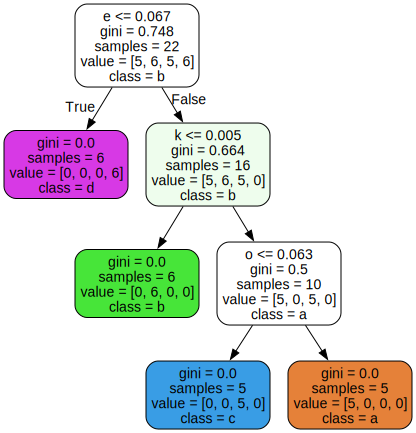

In [19]:
# (1) DT모델을 dot포맷의 파일로 저장 ==> export_graphviz()
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_best, out_file='tree.dot',
                class_names=df.columns,
                feature_names=dt_best.feature_names_in_,
                impurity=True, filled=True, rounded=True)

# (2) dot파일 출력
# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data = f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

[2] 로지스틱 회귀

In [20]:
lr_params = {'solver' : ['liblinear', 'lbfgs'],
             'max_iter': [100, 200, 300],
             'C': [1, 0.1, 0.01]}

In [21]:
lr = LogisticRegression()

# GridSearchCV 객체 생성
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_params,
                              cv=5, scoring='accuracy')

# 그리드 탐색 수행
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 0.1, 0.01], 'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [22]:
lr_best = lr_grid_search.best_estimator_

print(lr_grid_search.best_params_)

print(f"train score : {lr_best.score(X_train, y_train)}")
print(f"test score : {lr_best.score(X_test, y_test)}")

{'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
train score : 0.5454545454545454
test score : 0.3333333333333333


In [23]:
lr_pred_train = lr_best.predict(X_train)
lr_pred_test = lr_best.predict(X_test)

print(confusion_matrix(y_train, lr_pred_train))
print(confusion_matrix(y_test, lr_pred_test))

[[0 5 0 0]
 [0 6 0 0]
 [0 0 0 5]
 [0 0 0 6]]
[[0 2 0 0]
 [0 1 0 0]
 [0 1 0 1]
 [0 0 0 1]]


In [24]:
display_evaluation(lr_pred_train, lr_pred_test)

훈련 세트 정밀도 ['en' 'fr' 'id' 'tl'] : [0.         0.54545455 0.         0.54545455]
테스트 세트 정밀도 ['en' 'fr' 'id' 'tl'] : [0.   0.25 0.   0.5 ]

훈련 세트 민감도 ['en' 'fr' 'id' 'tl'] : [0. 1. 0. 1.]
테스트 세트 민감도 ['en' 'fr' 'id' 'tl'] : [0. 1. 0. 1.]

훈련 세트 F1 스코어 ['en' 'fr' 'id' 'tl'] : [0.         0.70588235 0.         0.70588235]
테스트 세트 F1 스코어 ['en' 'fr' 'id' 'tl'] : [0.         0.4        0.         0.66666667]


[3] 랜덤 포레스트

In [39]:
rf_params = {'max_depth' : [2, 4, 6],
             'min_samples_leaf': [2, 3, 4]}

In [40]:
rf = RandomForestClassifier(random_state=42)

# GridSearchCV 객체 생성
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_params,
                              cv=5, scoring='accuracy')

# 그리드 탐색 수행
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [2, 3, 4]},
             scoring='accuracy')

In [41]:
rf_best = rf_grid_search.best_estimator_

print(rf_grid_search.best_params_)

print(f"train score : {rf_best.score(X_train, y_train)}")
print(f"test score : {rf_best.score(X_test, y_test)}")

{'max_depth': 2, 'min_samples_leaf': 2}
train score : 1.0
test score : 1.0


In [42]:
rf_pred_train = rf_best.predict(X_train)
rf_pred_test = rf_best.predict(X_test)

print(confusion_matrix(y_train, rf_pred_train))
print(confusion_matrix(y_test, rf_pred_test))

[[5 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 6]]
[[2 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 1]]


In [43]:
display_evaluation(rf_pred_train, rf_pred_test)

훈련 세트 정밀도 ['en' 'fr' 'id' 'tl'] : [1. 1. 1. 1.]
테스트 세트 정밀도 ['en' 'fr' 'id' 'tl'] : [1. 1. 1. 1.]

훈련 세트 민감도 ['en' 'fr' 'id' 'tl'] : [1. 1. 1. 1.]
테스트 세트 민감도 ['en' 'fr' 'id' 'tl'] : [1. 1. 1. 1.]

훈련 세트 F1 스코어 ['en' 'fr' 'id' 'tl'] : [1. 1. 1. 1.]
테스트 세트 F1 스코어 ['en' 'fr' 'id' 'tl'] : [1. 1. 1. 1.]


In [46]:
from sklearn.metrics import classification_report

print('훈련 세트 분류 리포트')
print(classification_report(y_train, rf_pred_train))

print('테스트 세트 분류 리포트')
print(classification_report(y_test, rf_pred_test))

훈련 세트 분류 리포트
              precision    recall  f1-score   support

          en       1.00      1.00      1.00         5
          fr       1.00      1.00      1.00         6
          id       1.00      1.00      1.00         5
          tl       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

테스트 세트 분류 리포트
              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         1
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



[4] 중요한 변수만 다시 넣어서 로지스틱 돌려보기

In [30]:
feature_importances_dict = {key : value for key, value in zip(dt_best.feature_names_in_, dt_best.feature_importances_.round(3))}

sorted(feature_importances_dict.items(), key = lambda x : x[1], reverse = True)

[('e', 0.354),
 ('k', 0.342),
 ('o', 0.304),
 ('a', 0.0),
 ('b', 0.0),
 ('c', 0.0),
 ('d', 0.0),
 ('f', 0.0),
 ('g', 0.0),
 ('h', 0.0),
 ('i', 0.0),
 ('j', 0.0),
 ('l', 0.0),
 ('m', 0.0),
 ('n', 0.0),
 ('p', 0.0),
 ('q', 0.0),
 ('r', 0.0),
 ('s', 0.0),
 ('t', 0.0),
 ('u', 0.0),
 ('v', 0.0),
 ('w', 0.0),
 ('x', 0.0),
 ('y', 0.0),
 ('z', 0.0)]

> n, y, k가 중요한 변수이다.

In [31]:
new_featureDF = df.loc[:, ['n','y','k']]
targetSR = df['language']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(new_featureDF, targetSR,
                                                    stratify=targetSR,
                                                    train_size = 0.8,
                                                    random_state = 42)

In [33]:
print(f"X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}, y_test : {y_test.shape}")

X_train : (22, 3), y_train : (22,)
X_test : (6, 3), y_test : (6,)


In [34]:
lr_params = {'solver' : ['liblinear', 'lbfgs'],
             'max_iter': [100, 200, 300],
             'C': [1, 0.1, 0.01]}

In [35]:
lr = LogisticRegression()

# GridSearchCV 객체 생성
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_params,
                              cv=5, scoring='accuracy')

# 그리드 탐색 수행
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 0.1, 0.01], 'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [36]:
lr_best = lr_grid_search.best_estimator_

print(lr_grid_search.best_params_)

print(f"train score : {lr_best.score(X_train, y_train)}")
print(f"test score : {lr_best.score(X_test, y_test)}")

{'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
train score : 0.5454545454545454
test score : 0.3333333333333333


In [37]:
lr_pred_train = lr_best.predict(X_train)
lr_pred_test = lr_best.predict(X_test)

print(confusion_matrix(y_train, lr_pred_train))
print(confusion_matrix(y_test, lr_pred_test))

[[0 5 0 0]
 [0 6 0 0]
 [0 1 0 4]
 [0 0 0 6]]
[[0 2 0 0]
 [0 1 0 0]
 [0 1 0 1]
 [0 0 0 1]]


In [38]:
display_evaluation(lr_pred_train, lr_pred_test)

훈련 세트 정밀도 ['en' 'fr' 'id' 'tl'] : [0.  0.5 0.  0.6]
테스트 세트 정밀도 ['en' 'fr' 'id' 'tl'] : [0.   0.25 0.   0.5 ]

훈련 세트 민감도 ['en' 'fr' 'id' 'tl'] : [0. 1. 0. 1.]
테스트 세트 민감도 ['en' 'fr' 'id' 'tl'] : [0. 1. 0. 1.]

훈련 세트 F1 스코어 ['en' 'fr' 'id' 'tl'] : [0.         0.66666667 0.         0.75      ]
테스트 세트 F1 스코어 ['en' 'fr' 'id' 'tl'] : [0.         0.4        0.         0.66666667]


> 성능 개선이 없다. 아마 더 많은 데이터를 수집해야 할 것 같다.